# Predicting memory encoding based neural population statespace reconstruction from ECoG data

In [101]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy as sp
from scipy import io
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os
import sys

sys.path.append('/Users/rdgao/Documents/code/research/spectralCV/')
sys.path.append('/Users/rdgao/Documents/code/research/SpaceRecon/')

from nlds import delayembed as de
from nlds import dfa, utils, plotting
import neurodsp as ndsp
from scv_funcs import lfpca
CKEYS = plt.rcParams['axes.prop_cycle'].by_key()['color']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Kahana Trialinfo Columns
- (1) taskphase - phase of the experiment, encoding = 1, recall = 2
- (2) stim           - indicating whether stimulation was present during encoding (1 = yes, 0 = no) (in case of recall, during encoding of the recalled word)
- (3) subseqmem  - subsequent memory effect, for encoding: later remembered = 1, later forgotten =  0; for recall: 1 = successfully remembered, 0 = new word
- (4) list  - list number (i.e. task phase)
- (5) serialpos - serial position of word in list during encoding (for recall, NaN in case of new word)
- (6) wordno - numeric identifier of word presented/recalled (for recall, NaN in case of new word)
- (7) timefromprev  - time in seconds from begsample till previous event (positive indicates overlap)
- (8) timetonext - time in seconds from endsample till next event     (negative indicates overlap)

In [60]:
#datafile = '/Users/rdgao/Documents/data/Kahana/RAMPhase1_FR_Clean/R1020J_FR1_data_-800_2400.mat'
datafile = '/Users/rdgao/Documents/data/Kahana/RAMPhase1_FR_Clean/R1032D_FR1_data_-800_2400.mat'
# datafile = '/Users/rdgao/Documents/data/Kahana/RAMPhase1_FR_Clean/R1033D_FR1_data_-800_2400.mat'
# datafile = '/Users/rdgao/Documents/data/Kahana/RAMPhase1_FR_Clean/R1034D_FR1_data_-800_2400.mat'
#datafile = '/Users/rdgao/Documents/data/Kahana/RAMPhase1_FR_Clean/R1045E_FR1_data_-800_2400.mat'

data = io.loadmat(datafile, squeeze_me=True)
x = data['dat']
fs = data['srate']
outcome = data['trialinfo'][:,2]
nchan, tr_len, ntrials = x.shape
pre_inds = np.arange(0*fs, 0.8*fs) # prestim
stim_inds = np.arange(1.2*fs, 2.2*fs) # stim
post_inds = np.arange(2.4*fs, 3.2*fs) # poststim
print(x.shape)
print(tr_len/fs)
print(fs)

(20, 5120, 231)
3.2
1600


# Processing
- for each type of signal (raw, low freq, hfa, noise, etc)
    - for each task epoch (all, pre, stim, post)
        - do NESCA
        - compute delay MI, tau
        - compute embedding dimension
        - compute 

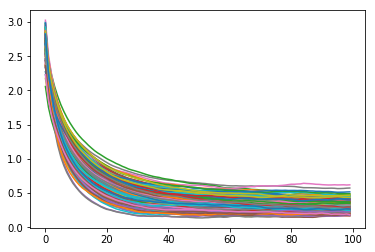

In [21]:
chan, trial = 0, 0
nbins, max_tau = 25, 100

MIs, opt_tau = [], []
for trial in range(ntrials):
    t_MI, MI = de.compute_delay_MI(x[chan,:,trial], nbins, max_tau)
    MIs.append(MI)
    plt.plot(t_MI, MI)
    opt_tau.append(de.find_valley(MI))


(array([17., 29., 40., 59., 43., 18., 17.,  3.,  1.,  4.]),
 array([0.01875 , 0.021625, 0.0245  , 0.027375, 0.03025 , 0.033125,
        0.036   , 0.038875, 0.04175 , 0.044625, 0.0475  ]),
 <a list of 10 Patch objects>)

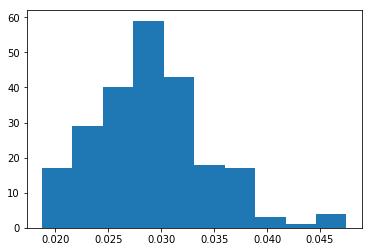

In [103]:
opt_tau = np.asarray(opt_tau)
plt.hist(opt_tau[:,0]/fs)

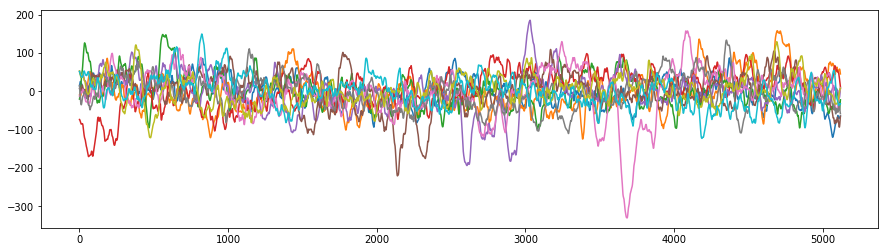

In [104]:
plt.figure(figsize=(15,4))
plt.plot(x[chan,:,:10]);

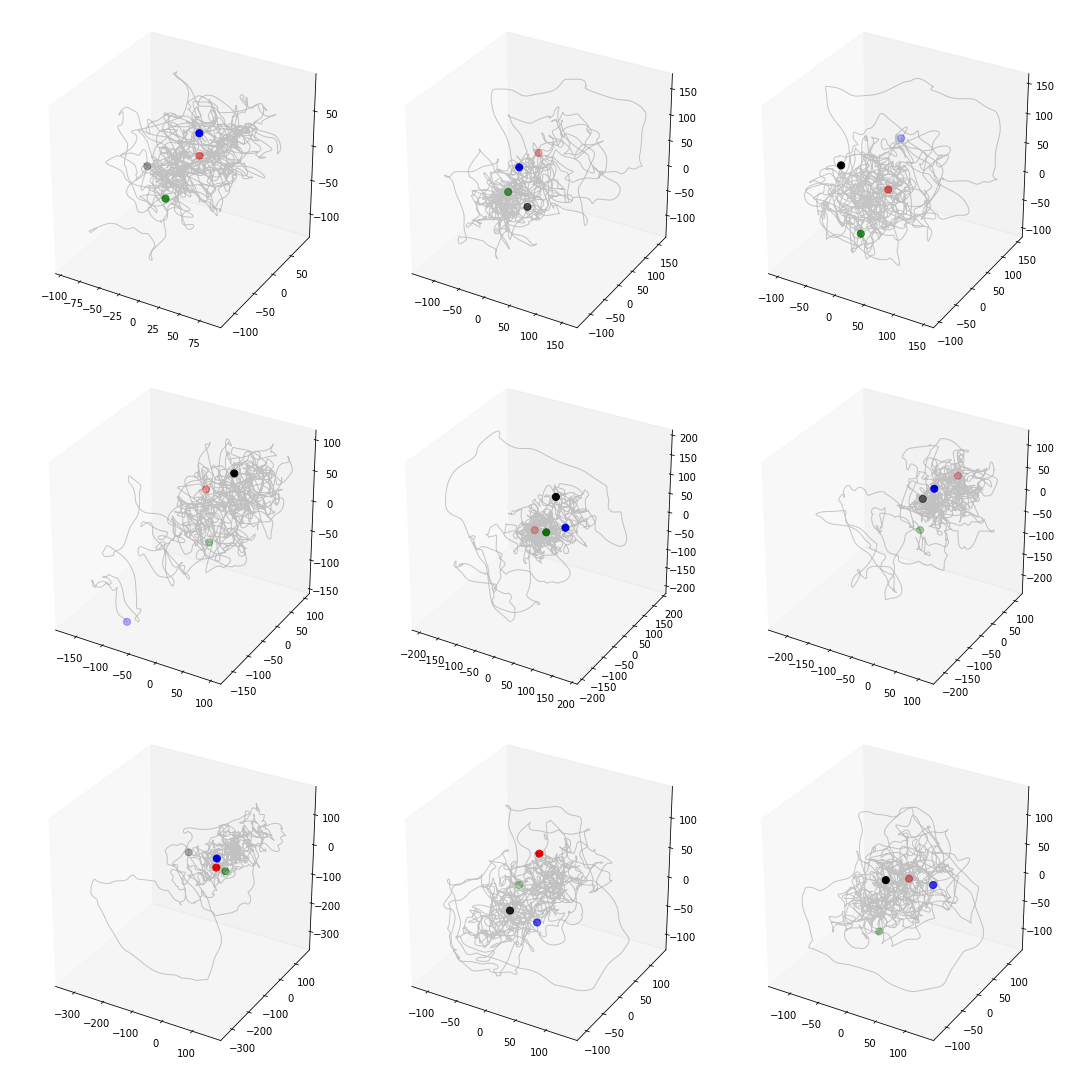

In [113]:
mark_inds = np.array([pre_inds[0], pre_inds[-1], stim_inds[0], stim_inds[-1]]).astype(int)
#mark_inds = [pre_inds[0], stim_inds[0]]
mark_colors = ['b', 'r', 'g', 'k']
plt.figure(figsize=(15,15))

for trial in range(9):
    ax = plt.subplot(3,3,trial+1, projection='3d')
    x_de = de.delay_embed(x[chan,:,trial],opt_tau[trial,0],3)
    ax = plotting.plot_statespace_trial(x_de,ax, mark_ind=mark_inds, mark_color=mark_colors, alpha=0.2, ms=50)
    
plt.tight_layout()

In [44]:
type(1) is not int

False